The dataset is acquired from kaggle (https://www.kaggle.com/carrie1/ecommerce-data)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df=pd.read_csv('data.csv', encoding= 'unicode_escape')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


The datetype for the InvoiceDate column is still object. Use pd.to_datetime to change it to datetime.

In [5]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
df.shape

(541909, 8)

Create a total transaction column by multiplying quantity and unit price

In [8]:
df['total_transaction']=df['Quantity']*df['UnitPrice']

In [9]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_transaction
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


Create a new columns of Month and Year of each transaction

In [10]:
df['Month']=df['InvoiceDate'].apply(lambda x:x.month)

In [11]:
df['Year']=df['InvoiceDate'].apply(lambda x:x.year)

Sort dataframe by year and month

In [12]:
df=df.sort_values(by=['Year','Month'])

In [13]:
mmap={1:'Jan11',2:'Feb11',3:'Mar11',4:'Apr11', 5:'May11', 6:'Jun11', 7:'Jul11',8:'Aug11',9:'Sep11',10:'Oct11',11:'Nov11',12:'Dec11'}

In [14]:
df['Month_name']=df['Month'].map(mmap)

In [15]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_transaction,Month,Year,Month_name
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,2010,Dec11
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010,Dec11
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12,2010,Dec11
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010,Dec11
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010,Dec11


In [16]:
def my(x):
    Month=x[0]
    Year=x[1]
    
    if Year==2010:
        Month='Dec10'
        return Month
    else:
        return Month

In [17]:
df['Month_name']=df[['Month_name','Year']].apply(my, axis=1)

In [18]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_transaction,Month,Year,Month_name
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,2010,Dec10
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010,Dec10
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12,2010,Dec10
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010,Dec10
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010,Dec10


## Total transaction by month

Figuring out the monthly total transactions from the data

In [19]:
monthly=df.groupby(['Year','Month','Month_name']).sum()

In [20]:
monthly

Quantity   UnitPrice    CustomerID  total_transaction
Year Month Month_name                                                       
2010 12    Dec10         342228  260520.850  4.166977e+08         748957.020
2011 1     Jan11         308966  172752.800  3.319198e+08         560000.260
     2     Feb11         277989  127448.770  3.117809e+08         498062.650
     3     Mar11         351872  171486.510  4.223298e+08         683267.080
     4     Apr11         289098  129164.961  3.541194e+08         493207.121
     5     May11         380391  190685.460  4.400088e+08         723333.510
     6     Jun11         341623  200717.340  4.264710e+08         691123.120
     7     Jul11         391116  171906.791  4.209226e+08         681300.111
     8     Aug11         406199  150385.680  4.219478e+08         682680.510
     9     Sep11         549817  199235.212  6.229373e+08        1019687.622
     10    Oct11         570532  263434.090  7.727017e+08        1070704.670
     11    Nov11         740286  327149.850  1.007384e+09        1461756.250
     12    Dec11         226333  133915.660  2.702551e+08         433668.010

In [21]:
monthly.reset_index(inplace=True)

In [22]:
monthly

,Year,Month,Month_name,Quantity,UnitPrice,CustomerID,total_transaction
0,2010,12,Dec10,342228,260520.850,4.166977e+08,748957.020
1,2011,1,Jan11,308966,172752.800,3.319198e+08,560000.260
2,2011,2,Feb11,277989,127448.770,3.117809e+08,498062.650
3,2011,3,Mar11,351872,171486.510,4.223298e+08,683267.080
4,2011,4,Apr11,289098,129164.961,3.541194e+08,493207.121
5,2011,5,May11,380391,190685.460,4.400088e+08,723333.510
6,2011,6,Jun11,341623,200717.340,4.264710e+08,691123.120
7,2011,7,Jul11,391116,171906.791,4.209226e+08,681300.111
8,2011,8,Aug11,406199,150385.680,4.219478e+08,682680.510
9,2011,9,Sep11,549817,199235.212,6.229373e+08,1019687.622


Text(0, 0.5, 'Total Transaction (mil)')

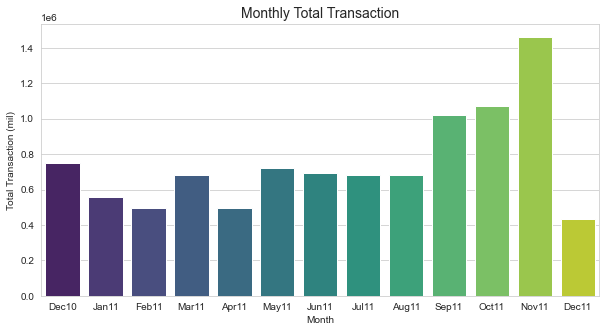

In [23]:
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
sns.barplot(x='Month_name', y='total_transaction', data=monthly, palette='viridis')
plt.title('Monthly Total Transaction', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Total Transaction (mil)')

Month with highest transaction = November 2011 <br/>
Month with lowest transaction = December 2011

## What happened in November 2011?

Figuring out what products are sold the most in November 2011 in terms of total transaction

In [24]:
nov11=df[(df['Month']==11) & (df['Year']==2011)]

In [25]:
nov11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84711 entries, 431673 to 516383
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   InvoiceNo          84711 non-null  object        
 1   StockCode          84711 non-null  object        
 2   Description        84636 non-null  object        
 3   Quantity           84711 non-null  int64         
 4   InvoiceDate        84711 non-null  datetime64[ns]
 5   UnitPrice          84711 non-null  float64       
 6   CustomerID         65598 non-null  float64       
 7   Country            84711 non-null  object        
 8   total_transaction  84711 non-null  float64       
 9   Month              84711 non-null  int64         
 10  Year               84711 non-null  int64         
 11  Month_name         84711 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(5)
memory usage: 8.4+ MB


Fill the missing values in Description column with 'unknown' so that the length matches the StockCode column

In [26]:
nov11['Description'].fillna('unknown', inplace=True)

C:\Users\user\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [27]:
nov11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84711 entries, 431673 to 516383
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   InvoiceNo          84711 non-null  object        
 1   StockCode          84711 non-null  object        
 2   Description        84711 non-null  object        
 3   Quantity           84711 non-null  int64         
 4   InvoiceDate        84711 non-null  datetime64[ns]
 5   UnitPrice          84711 non-null  float64       
 6   CustomerID         65598 non-null  float64       
 7   Country            84711 non-null  object        
 8   total_transaction  84711 non-null  float64       
 9   Month              84711 non-null  int64         
 10  Year               84711 non-null  int64         
 11  Month_name         84711 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(5)
memory usage: 8.4+ MB


Groupby StockCode and Description, and sort it by total transaction to know what products generate the most transactions

In [28]:
nov11=nov11.groupby(['StockCode','Description']).sum().sort_values(by='total_transaction', ascending=False)

### Top 10 products sold in Nov 2011

In [29]:
nov11['total_transaction'].head(10)

StockCode  Description                       
DOT        DOTCOM POSTAGE                        36905.40
23084      RABBIT NIGHT LIGHT                    34422.09
22086      PAPER CHAIN KIT 50'S CHRISTMAS        28883.04
85123A     WHITE HANGING HEART T-LIGHT HOLDER    14119.80
22197      POPCORN HOLDER                        13968.74
22910      PAPER CHAIN KIT VINTAGE CHRISTMAS     12831.54
22423      REGENCY CAKESTAND 3 TIER              12798.48
23355      HOT WATER BOTTLE KEEP CALM            11500.87
79321      CHILLI LIGHTS                         11475.07
85099B     JUMBO BAG RED RETROSPOT               11458.21
Name: total_transaction, dtype: float64

Compare it with other months

In [30]:
df['Description'].fillna('unknown', inplace=True)

In [31]:
pivot=df.pivot_table(index=['StockCode','Description'], values='total_transaction', columns='Month_name', aggfunc='sum').sort_values(by='Nov11', ascending=False)

In [32]:
pivot.head(10)

,Month_name,Apr11,Aug11,Dec10,Dec11,Feb11,Jan11,Jul11,Jun11,Mar11,May11,Nov11,Oct11,Sep11
StockCode,Description,,,,,,,,,,,,,
DOT,DOTCOM POSTAGE,7535.38,13400.52,24671.19,19872.69,10060.57,13918.53,12841.00,11848.66,11829.71,10229.30,36905.40,17955.13,15177.40
23084,RABBIT NIGHT LIGHT,NaN,3533.57,NaN,9618.01,NaN,NaN,668.59,3285.27,NaN,2279.57,34422.09,12249.71,699.78
22086,PAPER CHAIN KIT 50'S CHRISTMAS,-57.97,1028.94,9205.15,6870.71,24.95,143.32,1060.23,910.88,232.01,65.19,28883.04,9419.39,6006.10
85123A,WHITE HANGING HEART T-LIGHT HOLDER,5078.59,5589.72,9078.96,2044.95,5132.06,15191.96,8483.46,4624.76,5550.95,11172.17,14119.80,4756.05,6892.56
22197,POPCORN HOLDER,NaN,4057.62,NaN,5409.86,NaN,NaN,1498.41,798.28,NaN,NaN,13968.74,4778.77,3457.78
22910,PAPER CHAIN KIT VINTAGE CHRISTMAS,102.00,714.17,4981.02,2763.56,35.40,36.81,1187.18,24.33,102.00,36.75,12831.54,4631.67,4495.46
22423,REGENCY CAKESTAND 3 TIER,14280.90,8406.30,26897.36,5902.92,10466.04,11742.50,13777.56,9466.39,16830.60,12217.27,12798.48,12660.84,9315.03
23355,HOT WATER BOTTLE KEEP CALM,NaN,593.52,NaN,3974.68,NaN,NaN,NaN,NaN,NaN,NaN,11500.87,6066.69,6289.19
79321,CHILLI LIGHTS,357.50,2260.33,7506.44,2633.99,3616.25,5590.88,4294.99,2287.29,3093.05,2296.75,11475.07,4678.13,3677.39


As we can see in the pivot table above, top 10 items of November 2011 are sold significantly higher than in the other months. This might be due to christmas is around the corner so that people are buying gifts and new stuffs in November.

## Most and Least Popular Items

Discovering what are the most and least popular products based on the quantity

In [33]:
qty=df.pivot_table(index=['StockCode','Description'], values='Quantity', aggfunc='sum').sort_values(by='Quantity', ascending=False)

In [34]:
qty.reset_index(inplace=True)
qty.head()

,StockCode,Description,Quantity
0,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847
1,85099B,JUMBO BAG RED RETROSPOT,47363
2,84879,ASSORTED COLOUR BIRD ORNAMENT,36381
3,22197,POPCORN HOLDER,36334
4,21212,PACK OF 72 RETROSPOT CAKE CASES,36039


Text(0, 0.5, 'Item')

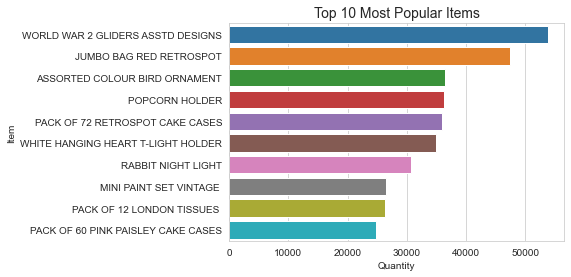

In [35]:
sns.barplot(y='Description', x='Quantity', data=qty.head(10))
plt.title('Top 10 Most Popular Items', fontsize=14)
plt.ylabel('Item')

Text(0, 0.5, 'Item')

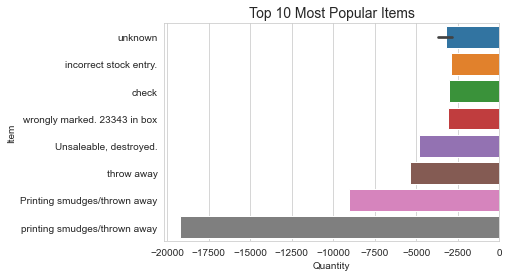

In [50]:
sns.barplot(y='Description', x='Quantity', data=qty.tail(10))
plt.title('Top 10 Most Popular Items', fontsize=14)
plt.ylabel('Item')

The data above doesn't actually make sense since the quantity is less than 0. <br>
Therefore we will drop the dataframe which quantity <=0

In [51]:
qty=qty[qty['Quantity']>0]

Text(0, 0.5, 'Item')

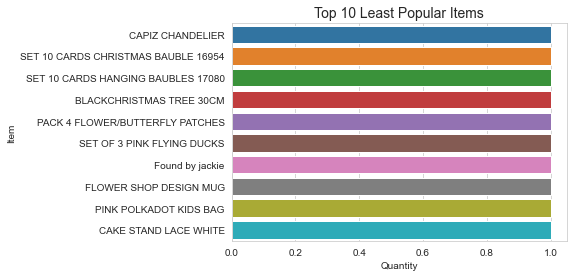

In [53]:
sns.barplot(y='Description', x='Quantity', data=qty.tail(10))
plt.title('Top 10 Least Popular Items', fontsize=14)
plt.ylabel('Item')

### Discovering countries with most transaction

In [70]:
bycountry=df.groupby('Country').sum()

In [71]:
bycountry.reset_index(inplace=True)

In [74]:
bycountry.sort_values(by='total_transaction', ascending=False).head()

,Country,Quantity,UnitPrice,CustomerID,total_transaction,Month,Year
36,United Kingdom,4263829,2.245715e+06,5.626433e+09,8.187806e+06,3752122,996366133
24,Netherlands,200128,6.492550e+03,3.419054e+07,2.846615e+05,15981,4768009
10,EIRE,142637,4.844719e+04,1.103917e+08,2.632768e+05,62967,16481753
14,Germany,117448,3.766600e+04,1.200751e+08,2.216982e+05,69223,19093880
13,France,110480,4.303199e+04,1.076489e+08,1.974039e+05,64339,17207688


Text(0.5, 1.0, '5 Countries with Most Transaction')

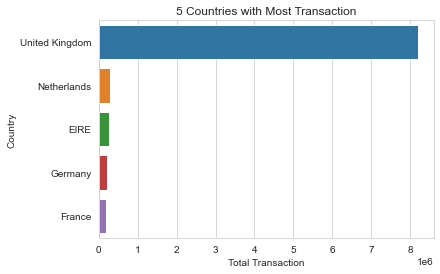

In [77]:
sns.barplot(x='total_transaction', y='Country', data=bycountry.sort_values(by='total_transaction', ascending=False).head())
plt.xlabel('Total Transaction')
plt.title('5 Countries with Most Transaction')

From the graph above we know that 5 top countries in terms of total transactions are UK, Netherlands, EIRE, Germany, and France

### Discovering most popular items of top countries

In [78]:
indexed=df.pivot_table(index=['Country','StockCode','Description'], values='Quantity', aggfunc='sum').reset_index()

Text(0, 0.5, 'Item')

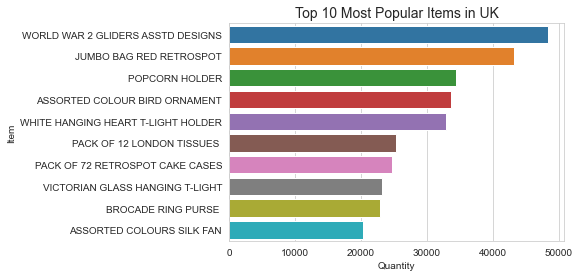

In [93]:
sns.barplot(y='Description', x='Quantity', data=indexed[indexed['Country']=='United Kingdom'].sort_values(by='Quantity', ascending=False).head(10))
plt.title('Top 10 Most Popular Items in UK', fontsize=14)
plt.ylabel('Item')

Text(0, 0.5, 'Item')

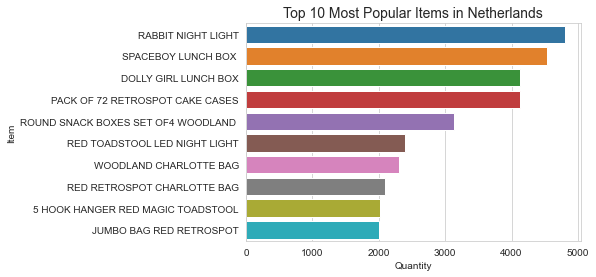

In [94]:
sns.barplot(y='Description', x='Quantity', data=indexed[indexed['Country']=='Netherlands'].sort_values(by='Quantity', ascending=False).head(10))
plt.title('Top 10 Most Popular Items in Netherlands', fontsize=14)
plt.ylabel('Item')

Text(0, 0.5, 'Item')

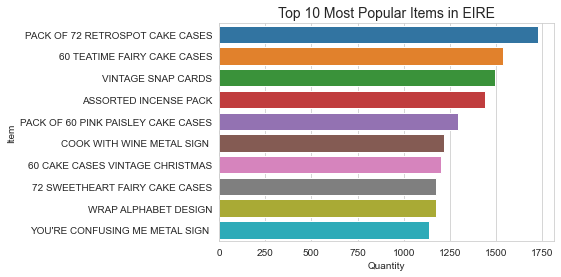

In [89]:
sns.barplot(y='Description', x='Quantity', data=indexed[indexed['Country']=='EIRE'].sort_values(by='Quantity', ascending=False).head(10))
plt.title('Top 10 Most Popular Items in EIRE', fontsize=14)
plt.ylabel('Item')

Text(0, 0.5, 'Item')

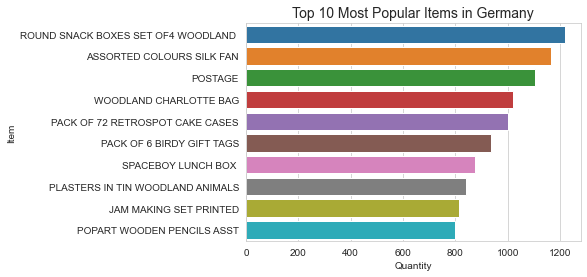

In [91]:
sns.barplot(y='Description', x='Quantity', data=indexed[indexed['Country']=='Germany'].sort_values(by='Quantity', ascending=False).head(10))
plt.title('Top 10 Most Popular Items in Germany', fontsize=14)
plt.ylabel('Item')

Text(0, 0.5, 'Item')

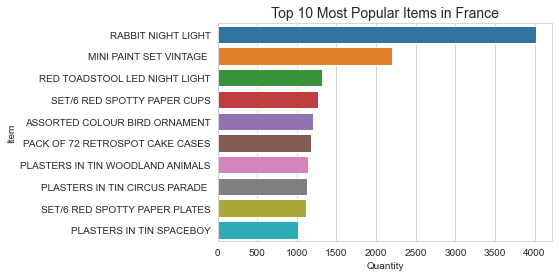

In [92]:
sns.barplot(y='Description', x='Quantity', data=indexed[indexed['Country']=='France'].sort_values(by='Quantity', ascending=False).head(10))
plt.title('Top 10 Most Popular Items in France', fontsize=14)
plt.ylabel('Item')

## Customer Churn

Assume that customers who didn't do any transactions for the last 6 months are categorized as churn.

First, figure out the last date of InvoiceDate as a point of reference

In [39]:
df.sort_values(by='InvoiceDate', ascending=False).head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_transaction,Month,Year,Month_name
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85,12,2011,Dec11


So the last InvoiceDate is 2011-12-09

That means customers who did not have any transaction data since 2011-06-09 (6 months to the last invoice date), are categorized as churn.

Group dataframe by CustomerID, set aggregate function as max() and grab the invoice date

In [41]:
cust=df.groupby('CustomerID').max().sort_values(by='InvoiceDate', ascending=False)

In [42]:
cust.loc[cust['InvoiceDate'] < '2011-06-09', 'Churn']='Yes'
cust.loc[cust['InvoiceDate'] >= '2011-06-09', 'Churn']='No'

In [43]:
cust

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,total_transaction,Month,Year,Month_name,Churn
CustomerID,,,,,,,,,,,,
12680.0,581587,POST,SPACEBOY LUNCH BOX,36,2011-12-09 12:50:00,18.00,France,36.00,12,2011,Sep11,No
13113.0,C570274,M,WICKER STAR,200,2011-12-09 12:49:00,12.75,United Kingdom,1700.00,12,2011,Oct11,No
15804.0,C578110,90205A,ZINC WILLIE WINKIE CANDLE STICK,48,2011-12-09 12:31:00,125.00,United Kingdom,250.00,12,2011,Sep11,No
13777.0,C579752,M,WHITE HANGING HEART T-LIGHT HOLDER,504,2011-12-09 12:25:00,12.75,United Kingdom,1383.12,12,2011,Sep11,No
17581.0,C568571,85231G,ZINC FOLKART SLEIGH BELLS,50,2011-12-09 12:21:00,195.00,United Kingdom,195.00,12,2011,Sep11,No
...,...,...,...,...,...,...,...,...,...,...,...,...
16583.0,536420,22969,WOODEN BOX OF DOMINOES,12,2010-12-01 12:03:00,4.95,United Kingdom,20.40,12,2010,Dec10,Yes
17908.0,536409,90210B,WHITE SKULL HOT WATER BOTTLE,28,2010-12-01 11:45:00,7.95,United Kingdom,19.05,12,2010,Dec10,Yes
12791.0,536403,POST,POSTAGE,96,2010-12-01 11:27:00,15.00,Netherlands,177.60,12,2010,Dec10,Yes


So there are 4372 customers.<br/>
All the customers categorized as churn are as follows:

In [44]:
cust[cust['Churn']=='Yes']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,total_transaction,Month,Year,Month_name,Churn
CustomerID,,,,,,,,,,,,
16832.0,556098,47590A,ROSE COTTAGE KEEPSAKE BOX,12,2011-06-08 15:36:00,16.95,United Kingdom,62.50,6,2011,May11,Yes
14622.0,556040,85099C,WOODEN PICTURE FRAME WHITE FINISH,24,2011-06-08 12:42:00,7.95,United Kingdom,23.60,6,2011,Jun11,Yes
16955.0,C538725,47590B,RIBBON REEL POLKADOTS,48,2011-06-08 10:36:00,16.95,United Kingdom,50.85,12,2011,Jun11,Yes
17409.0,555945,85014B,WHITE LOVEBIRD LANTERN,12,2011-06-08 10:36:00,14.95,United Kingdom,119.60,6,2011,Jun11,Yes
12383.0,C541586,POST,WHITE WOOD GARDEN PLANT LADDER,144,2011-06-08 08:02:00,18.00,Belgium,72.00,12,2011,Mar11,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
16583.0,536420,22969,WOODEN BOX OF DOMINOES,12,2010-12-01 12:03:00,4.95,United Kingdom,20.40,12,2010,Dec10,Yes
17908.0,536409,90210B,WHITE SKULL HOT WATER BOTTLE,28,2010-12-01 11:45:00,7.95,United Kingdom,19.05,12,2010,Dec10,Yes
12791.0,536403,POST,POSTAGE,96,2010-12-01 11:27:00,15.00,Netherlands,177.60,12,2010,Dec10,Yes


In [45]:
churn=cust.reset_index().groupby('Churn').count()

In [46]:
churn.head()

,CustomerID,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,total_transaction,Month,Year,Month_name
Churn,,,,,,,,,,,,
No,3523,3523,3523,3523,3523,3523,3523,3523,3523,3523,3523,3523
Yes,849,849,849,849,849,849,849,849,849,849,849,849


([<matplotlib.patches.Wedge at 0x24b542f4610>,
 [Text(-0.9015706645541274, 0.6302145165064267, 'Aktif'),
  Text(0.9015706350516557, -0.630214558711995, 'Churn')],
 [Text(-0.491765817029524, 0.3437533726398691, '81%'),
  Text(0.49176580093726663, -0.34375339566108815, '19%')])

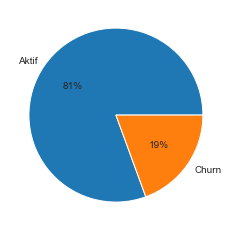

In [47]:
plt.pie(churn['CustomerID'], labels=['Aktif', 'Churn'], autopct='%1.0f%%')

Based on the dataframe above, 849 of 4372 or approximately 19% of the total customers are categorized as churn.

## Thank You